In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
cur_path = "./drive/Othercomputers/Vivian's MacBook Pro 2021/DS5720/FinalProject"
os.chdir(cur_path)
!pwd

/content/drive/Othercomputers/Vivian's MacBook Pro 2021/DS5720/FinalProject


# Data Import

In [ ]:
import pandas as pd

In [ ]:
task = pd.read_csv("./data/task2/train-v0.2.csv")
mega_table = pd.read_csv("./data/product_catalogue-v0.2.csv")

In [ ]:
merged_df = pd.merge(task, mega_table, how = 'left', left_on = ['product_id', 'query_locale'], right_on = ['product_id', 'product_locale'])

In [ ]:
merged_df = merged_df.fillna('')
merged_df.head()

,example_id,query,product_id,query_locale,esci_label,product_title,product_description,product_bullet_point,product_brand,product_color_name,product_locale
0,0,11 degrees,B079VKKJN7,es,exact,"11 Degrees de los Hombres Playera con Logo, Ne...",Esta playera con el logo de la marca Carrier d...,11 Degrees Negro Playera con logo\nA estrenar ...,11 Degrees,Negro,es
1,1,11 degrees,B079Y9VRKS,es,exact,Camiseta Eleven Degrees Core TS White (M),,,11 Degrees,Blanco,es
2,2,11 degrees,B07D2DDCZH,es,exact,"11 Degrees de los Hombres Camiseta Muscle Fit,...",De 11 Degrees viene la camiseta Muscle Fit en ...,11 Degrees Negro Camiseta Muscle Fit\nA estren...,11 Degrees,Negro,es
3,3,11 degrees,B07DP4LM9H,es,exact,11 Degrees de los Hombres Core Pull Over Hoodi...,La sudadera con capucha Core Pull Over de 11 G...,11 Degrees Azul Core Pull Over Hoodie\nA estre...,11 Degrees,Azul,es
4,4,11 degrees,B07G37B9HP,es,exact,11 Degrees Poli Panel Track Pant XL Black,,,11 Degrees,,es


# lang selection & subset

In [ ]:
lang = 'us'
merged_df = merged_df[merged_df['product_locale']==lang]#[:50000]

In [ ]:
!pip install sentence_transformers

     |████████████████████████████████| 79 kB 3.4 MB/s 
     |████████████████████████████████| 4.0 MB 8.4 MB/s 
     |████████████████████████████████| 1.2 MB 53.3 MB/s 
     |████████████████████████████████| 77 kB 6.5 MB/s 
     |████████████████████████████████| 880 kB 52.1 MB/s 
     |████████████████████████████████| 596 kB 64.9 MB/s 
     |████████████████████████████████| 6.6 MB 54.3 MB/s 
     |████████████████████████████████| 96 kB 6.9 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.0-py3-none-any.whl size=120747 sha256=dae5b263ffb03624adff5324f53335fb8d924c941b06a13375383a0a33b3ff78
  Stored in directory: /root/.cache/pip/wheels/83/c0/df/b6873ab7aac3f2465aa9144b6b4c41c4391cfecc027c8b07e7
  Created wheel for sacremoses: filename=sacremoses-0.0.50-py3-none-any.whl size=895166 sha256=cd1fb3745765d9241aa6d97e0ab62ef0c1ccf4f2ba279f6f3e78670fe7d0cc19
  Stored in directory: /root/.cache/pip/wheels/d9/72/54/519f0d5143cc6c73fa3297509123c86fc8586a7

## Encoder model

In [ ]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('fabriceyhc/bert-base-uncased-amazon_polarity')#('sentence-transformers/distiluse-base-multilingual-cased-v1')

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/7.26k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/727 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/438M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/321 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.61k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Some weights of the model checkpoint at /root/.cache/torch/sentence_transformers/fabriceyhc_bert-base-uncased-amazon_polarity were not used when initializing BertModel: ['classifier.bias', 'classifier.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


## Encode queries

In [ ]:
queries = merged_df['query'].unique().tolist()
print(len(queries))
queries_embeddings = model.encode(queries, show_progress_bar = True, )
queries_embeddings

68139


Batches:   0%|          | 0/2130 [00:00<?, ?it/s]

array([[ 3.7721539e-01,  2.8850505e-01,  9.2093074e-01, ...,
        -7.5417161e-03,  5.3084713e-01,  8.7120391e-02],
       [ 2.3709109e-01,  1.9300619e-01,  1.9530456e-01, ...,
        -9.1698927e-01, -1.3225849e-01, -2.9052535e-01],
       [ 3.9659384e-01,  4.4133782e-01,  6.6782707e-01, ...,
        -9.7550470e-01, -5.2204490e-01, -8.4227562e-02],
       ...,
       [ 8.5584480e-01,  3.9087352e-01,  2.3345578e-01, ...,
        -1.9866954e-01, -1.3698918e-01, -2.0561962e-01],
       [ 7.8977042e-01,  1.6183716e-01,  2.7436790e-01, ...,
         2.6295111e-01,  2.1375984e-01, -5.5145845e-04],
       [ 5.7610720e-01, -4.1556683e-01,  6.9165325e-01, ...,
         6.1966622e-01, -1.7563237e-01, -1.7038414e-01]], dtype=float32)

In [ ]:
query_df = pd.DataFrame(queries, columns=['Query'])
for i in range(len(queries_embeddings[0])):
  query_df['query_%d' % i]=queries_embeddings[:,i]
query_df.to_csv("./data/us_query_embedding.csv")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  This is separate from the ipykernel package so we can avoid doing imports until


## Encode Products

In [ ]:
# products = pd.read_csv("./data/unique_product_detail.csv")
# products = products['product'].tolist()

subset_product = products[800000:830000]
products_embeddings = model.encode(subset_product, show_progress_bar = True)
products_embeddings

product_df = pd.DataFrame(subset_product, columns=['Product'])
for i in range(len(products_embeddings[0])):
  product_df['product_%d' % i]=products_embeddings[:,i]
product_df.to_csv("./data/us_product_title_embedding.csv", mode='a', header=False)


Batches:   0%|          | 0/938 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
len(products)

907004

## Reduce Embeddings to 2d

### Product

In [ ]:
! pip install umap-learn
import umap.umap_ as umap
product_title_embed = pd.read_csv("./data/us_product_title_embedding.csv")
reducer = umap.UMAP()


In [ ]:
total_df = pd.DataFrame(columns = ['Product', 'product_0', 'product_1'])
total_df.to_csv("./data/product_2d_embedding.csv", index=False)

for i in range(17):
  sub_df = pd.DataFrame()
  sub = product_title_embed[i*50000:(i+1)*50000].drop(columns=['Unnamed: 0', 'Product']).values.tolist()
  sub_df['Product'] = product_title_embed[i*50000:(i+1)*50000]['Product']
  review2D = reducer.fit_transform(sub)
  for i in range(len(review2D[0])):
    sub_df['product_%d' % i]=review2D[:,i]
  sub_df.to_csv("./data/product_2d_embedding.csv", mode='a', header=False, index=False)

### Query

In [ ]:
query_embed = pd.read_csv("./data/us_query_embedding.csv")
query_embed['combined']=query_embed.drop(columns=['Unnamed: 0', 'Query']).values.tolist()
review2D = reducer.fit_transform(query_embed['combined'].tolist())
for i in range(len(review2D[0])):
  query_embed['query_%d' % i]=review2D[:,i]

In [18]:
query_embed = query_embed[['Query', 'query_0', 'query_1']]
query_embed.to_csv("./data/query_2d_embedding.csv", index=False)

## Reduce Embeddings to 88d

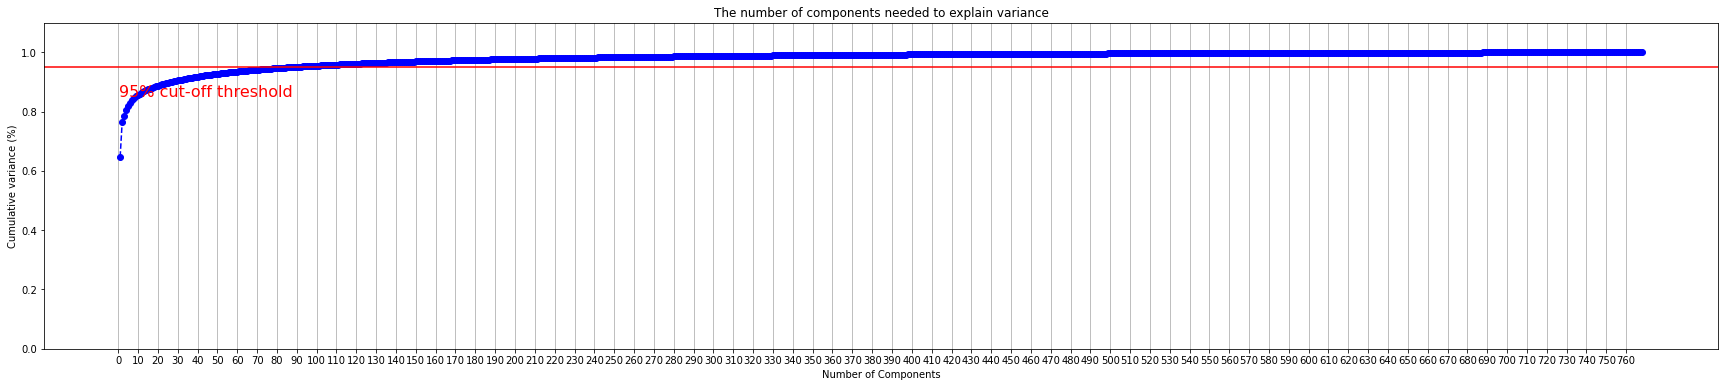

In [26]:
from sklearn.decomposition import PCA
import numpy as np

sub = product_title_embed[i*50000:(i+1)*50000].drop(columns=['Unnamed: 0', 'Product']).values.tolist()
pca = PCA(n_components = 0.95).fit(sub)

% matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (30,6)

fig, ax = plt.subplots()
xi = np.arange(1, 769, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 769, step=10)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [41]:
pca95 = PCA(n_components=88).fit(sub)

88

In [ ]:
columns = ['Product'] + ['product_%d' % i for i in range(88)]
total_df = pd.DataFrame(columns = columns)
total_df.to_csv("./data/product_88d_embedding.csv", index=False)

for i in range(17):
  print(i, i*50000, (i+1)*50000)
  sub_df = pd.DataFrame()
  sub = product_title_embed[i*50000:(i+1)*50000].drop(columns=['Unnamed: 0', 'Product']).values.tolist()
  sub_df['Product'] = product_title_embed[i*50000:(i+1)*50000]['Product']
  review88D = pca95.fit_transform(sub)
  print(len(review88D[0]))
  for j in range(len(review88D[0])):
    sub_df['product_%d' % j]=review88D[:,j]
  sub_df.to_csv("./data/product_88d_embedding.csv", mode='a', header=False, index=False)


In [ ]:
sub_df = pd.DataFrame()
sub = product_title_embed[850000:].drop(columns=['Unnamed: 0', 'Product']).values.tolist()
sub_df['Product'] = product_title_embed[850000:]['Product']
review88D = pca95.fit_transform(sub)
print(len(review88D[0]))
for j in range(len(review88D[0])):
  sub_df['product_%d' % j]=review88D[:,j]
sub_df.to_csv("./data/product_88d_embedding.csv", mode='a', header=False, index=False)

In [45]:
len(pd.read_csv("./data/product_88d_embedding.csv"))

857003

In [47]:
query_embed = pd.read_csv("./data/us_query_embedding.csv")
query_embed['combined']=query_embed.drop(columns=['Unnamed: 0', 'Query']).values.tolist()
review88D = pca95.fit_transform(query_embed['combined'].tolist())
for i in range(len(review88D[0])):
  query_embed['new_query_%d' % i]=review88D[:,i]
query_embed

,Unnamed: 0,Query,query_0,query_1,query_2,query_3,query_4,query_5,query_6,query_7,...,new_query_78,new_query_79,new_query_80,new_query_81,new_query_82,new_query_83,new_query_84,new_query_85,new_query_86,new_query_87
0,0,revent 80 cfm,0.377215,0.288505,0.920931,-0.115525,0.445553,-0.570641,0.595405,-0.148015,...,-0.332963,-0.266428,-1.551271,0.154520,0.061923,0.142414,-0.651916,0.303419,-0.051140,0.536314
1,1,# 2 pencils not sharpened,0.237091,0.193006,0.195305,-0.486425,-0.312413,-0.417925,1.102214,0.421922,...,-0.330922,-0.346296,-0.273485,0.096726,0.400008,0.175796,-0.027472,0.446339,0.169831,-0.049558
2,2,# do not disturb,0.396594,0.441338,0.667827,-0.936926,-0.549741,-0.856408,1.572625,0.615896,...,-0.520815,0.418793,0.053477,-0.073708,-0.297111,-0.411706,-0.177189,0.340349,0.786187,-0.131820
3,3,# mom life,0.981517,0.575381,0.908564,0.327151,0.827399,0.073781,-0.170673,-0.249114,...,-0.375042,-0.510815,0.181681,-0.383883,-0.414233,0.097334,-0.228324,-0.035071,0.503188,0.070362
4,4,# sharp not hashtag shirt,0.709668,0.562953,0.211240,-0.595937,-0.242579,-0.620139,0.902979,1.069579,...,-0.643404,-0.109964,0.136372,-0.256343,-0.054554,-0.171912,-0.410900,0.841856,0.730485,-0.067402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68134,68134,tach adapter,0.301992,-0.207159,0.554545,0.663136,0.722951,0.171899,-0.513479,-0.669280,...,0.240037,-0.152741,0.054560,0.425365,-0.575418,0.179635,0.228090,-0.377829,-0.117525,0.252862
68135,68135,the armorer vintage collection,0.448149,0.234424,0.376844,0.071149,1.156071,0.284224,-0.925919,-0.404218,...,-0.254649,0.523332,0.031313,0.298121,-0.338132,-0.445540,-0.155152,-0.273414,0.568763,-0.184532
68136,68136,trojan magnum condoms for men,0.855845,0.390874,0.233456,0.039043,0.458415,0.138231,0.161622,-0.378808,...,-0.195303,0.038945,-0.074419,0.046288,-0.277138,0.307894,-0.116370,-0.113895,-0.370027,0.404469
68137,68137,white adirondack chairs,0.789770,0.161837,0.274368,0.447206,1.247355,0.073073,-0.513006,-0.032853,...,0.005265,-0.258020,-0.370123,-0.094800,-0.056420,-0.018627,-0.311856,0.050689,-0.439044,-0.554436


In [48]:
columns = ['Query'] + ['new_query_%d' % i for i in range(88)]

query_embed = query_embed[columns]
query_embed.to_csv("./data/query_88d_embedding.csv", index=False)